# Example 3

### Packages and aesthetic purposed variables

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import math
import pandas as pd
import numpy as np

#Size of plot
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

## Tridiagonal solver

We implemented the tridiagonal algorithm for solving linear systems of equations with tridiagonal matrices, we set $K$ as suggested by example $14.3$ and we solved the system in order to find the values of the internal nodes. 

In [7]:
n = 10
l = 1
f = lambda x: -x + math.log(x + 1) / math.log(2)

# generates matrix M and array b
def generateElements(n):
    h = l/n
    x = np.arange(0,l+1/n,h)
    s = np.fromiter((h+h**2*(j+1/2) for j in range(n+1)), float, n+1)
    b = np.fromiter((h for j in range(n+1)), float, n+1)
    M = (np.diag(np.fromiter((-s[i] for i in range(1,n-1)),float,n-2),1)+(
        np.diag(np.fromiter((s[i]+s[i+1] for i in range(n-1)),float,n-1),0) +(
        np.diag(np.fromiter((-s[i] for i in range(1,n-1)),float,n-2),-1)
        )))
    return x,b,M

# Solves de tridiagonal system
def TriDiagonalSolver(M,b):
    m = M.shape[0]
    A = M.diagonal(-1).copy()
    B = M.diagonal(0).copy()
    C = M.diagonal(1).copy()
    D = b.copy()
    X = np.zeros(m+2)
    W = 0
    for i in range(1,m):
        W = A[i-1]/B[i-1]
        B[i] = B[i]-W*C[i-1]
        D[i] = D[i]-W*D[i-1]
    X[m] = D[m-1]/B[m-1]
    for i in range(m-2 ,-1, -1):
        X[i+1] = (D[i]-C[i]*X[i+2])/B[i]
    return X/(m+1)**2

x,b,M = generateElements(n)
# c is the approximate solution
c = TriDiagonalSolver(M,b)
pd.DataFrame(c).T

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.037461,0.06297,0.078437,0.085352,0.084893,0.078011,0.065487,0.047964,0.025982,0.0


## Interactive plot for the comparisson between $f(x)$ and $c(x)$
We added an slider that changes $n$ and plots the solution for that $n$

In [53]:
def graph(n):
    fig,ax = plt.subplots()
    x,b,M = generateElements(n)
    c = TriDiagonalSolver(M,b)
    if len(c) < len(x):
        x = x[:-1]
    set_size(10,6,ax)
    ax.set_xlabel("$x$",fontsize=18)
    # Plots approximate solution
    ax.plot(x,c, label="$c(x)$")
    # Plots real solution
    ax.plot(np.arange(0,l+1/40,l/40),np.fromiter((f(x) for x in np.arange(0,l+1/40,l/40)), dtype=float), label="$f(x)$")
    plt.legend(loc="upper left")
    return ax
interact(graph, n=(2,20,1))

interactive(children=(IntSlider(value=11, description='n', max=20, min=2), Output()), _dom_classes=('widget-in…

<function __main__.graph(n)>

In [15]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

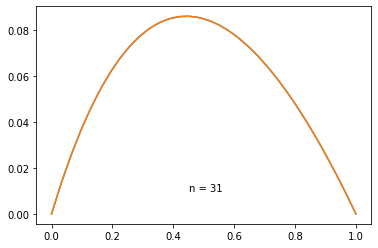

In [54]:
fig,ax = plt.subplots()
def animate(i):
    ax.clear()
    x,b,M = generateElements(i+2)
    c = TriDiagonalSolver(M,b)
    if len(c) < len(x):
        x = x[:-1]
    linec = ax.plot(x,c, label="$c(x)$")
    linef = ax.plot(np.arange(0,l+1/40,l/40),np.fromiter((f(x) for x in np.arange(0,l+1/40,l/40)), dtype=float), label="$f(x)$")
    text = ax.text(0.45,0.01,"n = "+str(i+2))
    return linec
        
ani = FuncAnimation(fig, animate, interval=50, blit=True, repeat=True, frames=30)    
ani.save("resultsEX3.gif", dpi=300, writer=PillowWriter(fps=2))